In [247]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
import missingno as msno
from sklearn.impute import SimpleImputer
# import arviz as az
# import pymc3 as pm
# from theano import tensor as tt
from fitter import Fitter, get_common_distributions, get_distributions
# import mean_squared_error
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from scipy import signal
from pandas.plotting import autocorrelation_plot
from pandas.plotting import lag_plot
from pmdarima.arima import auto_arima
from pmdarima.arima import ADFTest
from sklearn.experimental import enable_iterative_imputer
from sklearn import linear_model
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler

In [248]:
os.chdir('G:/My Drive/To_Do/MMM/Raw_Hain_Data')

In [277]:
dm = pd.read_csv('deutsch_matterkind.csv', low_memory=False)
ts = pd.read_csv('Celestial_Trade_Spend_5_22.csv')
cd = pd.read_csv('celestial_data_16_22_22.csv')
dm_pivot = pd.read_csv('dm_Robyn.csv')

In [279]:
df = dm_pivot

In [280]:
def missing_values(df):
    segment = [var for var in df.columns if df[var].dtype == 'O']
    print('There are {} variables\n'.format(len(segment)))
    print('The variables are :\n\n', segment)
    print('The percentage missing of each of the variables is:\n')
    print(df[segment].isnull().sum() * 100/ len(df))
    print('The count of non-nulls for each of the variables is:\n')
    missing = df.select_dtypes(include=object)
    missing.info()

In [281]:
def dickey_fuller(df):
    adf_test = ADFTest(alpha = .05)
    print('Because the ADF is smaller than the given alpha, the null hypothesis is false,'
          'and it is most likely not stationery.')
    a = adf_test.should_diff(df['Impressions'])
    return a

In [282]:
def unique(df):
    segment = [var for var in df.columns if df[var].dtype == 'O']
    print('There are {} numerical/continuous variables\n'.format(len(segment)))
    print('The numerical/continuous variables are :\n\n', segment)
    print(df[segment].isnull().sum() / len(df))
    df.info()
    df.describe()
    print(df.nunique())

In [283]:
def summary(df):
    print(missing_values(df))
    print(dickey_fuller(df))
    print(unique(df))

In [301]:
summary(df)

There are 1 variables

The variables are :

 ['DATE']
The percentage missing of each of the variables is:

DATE    0.0
dtype: float64
The count of non-nulls for each of the variables is:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   DATE    46 non-null     object
dtypes: object(1)
memory usage: 496.0+ bytes
None
Because the ADF is smaller than the given alpha, the null hypothesis is false,and it is most likely not stationery.
(0.01, False)
There are 1 numerical/continuous variables

The numerical/continuous variables are :

 ['DATE']
DATE    0.0
dtype: float64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DATE           46 non-null     object 
 1   onlinevideo_S  31 non-null     float64
 2   onlinevideo_I  3

In [302]:
df = df.drop(['audio_S', 'audio_I', 'ott_I',
                            'ott_S', 'tiktok_I', 'tiktok_S'], axis=1)
df.nunique()

KeyError: "['audio_S', 'audio_I', 'ott_I', 'ott_S', 'tiktok_I', 'tiktok_S'] not found in axis"

In [287]:
df = df.drop(['onlinedisplay_S', 'onlinedisplay_I'], axis=1)

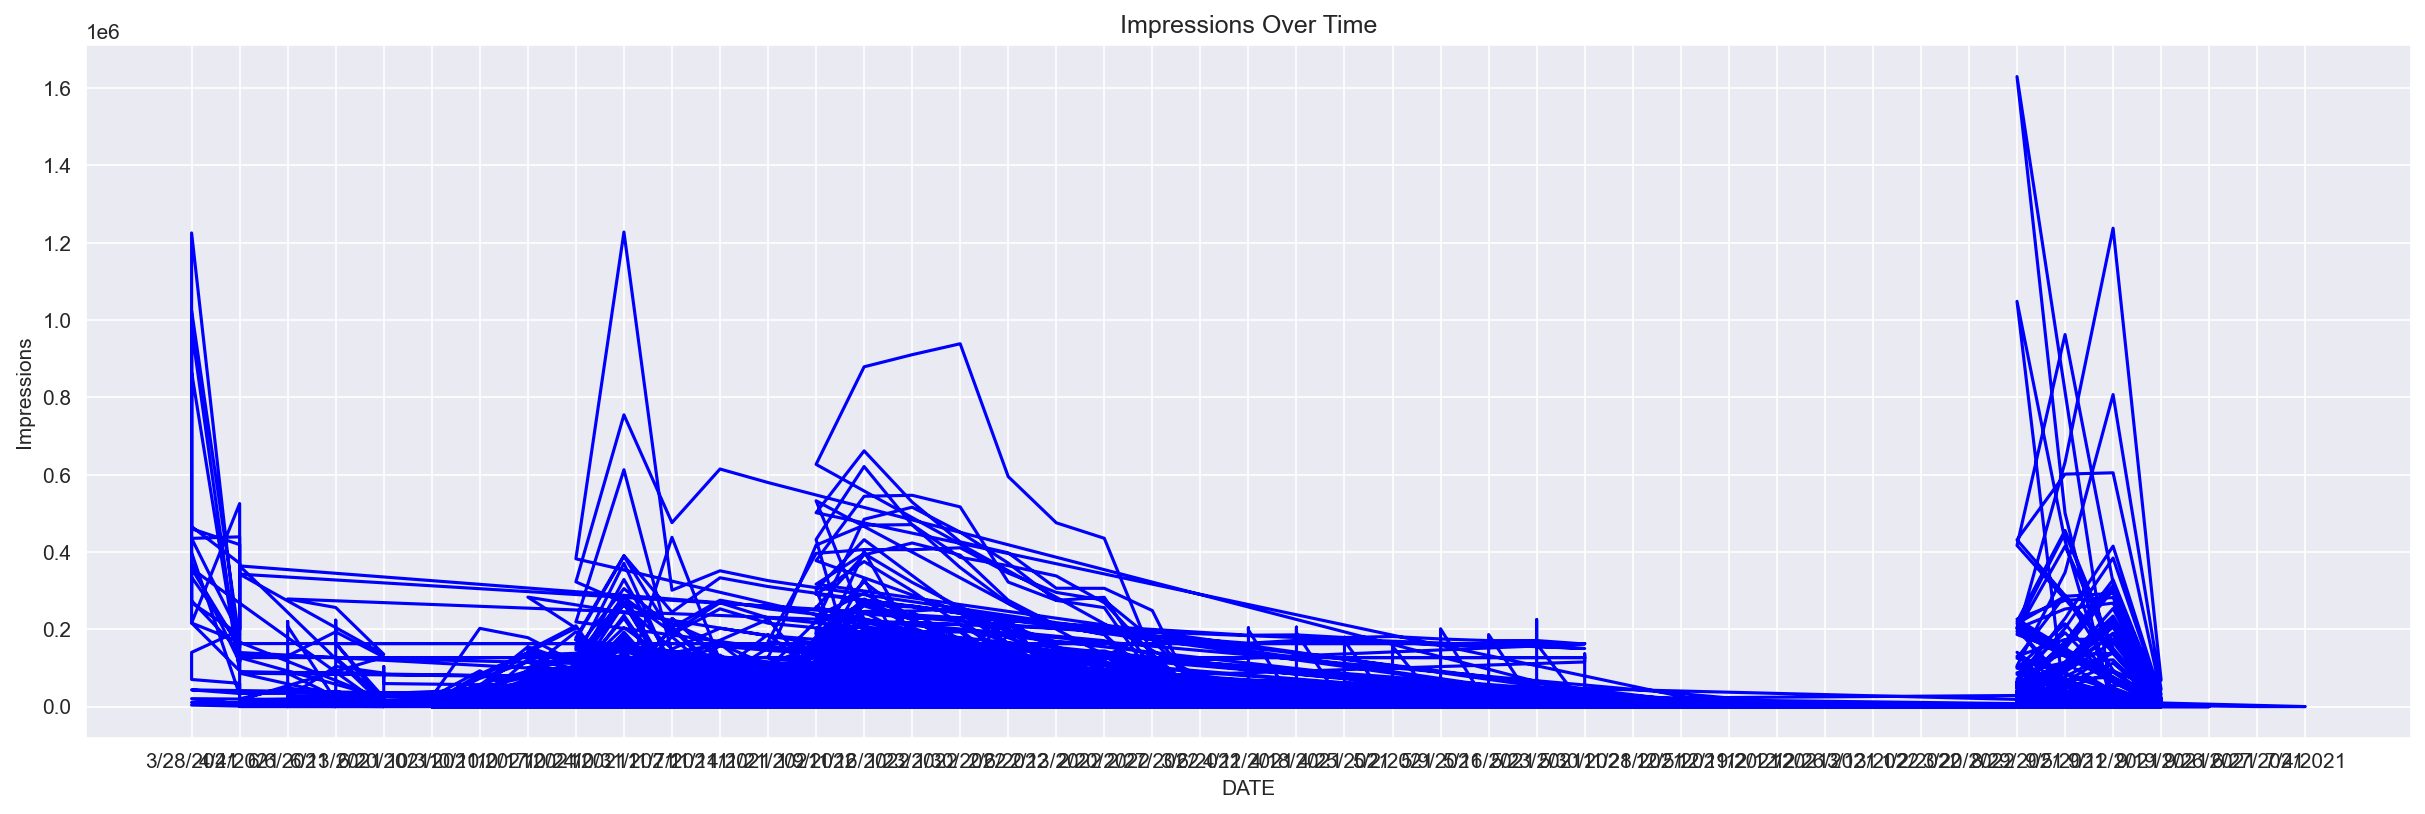

In [258]:
# df_dm.sort_values(by=['DATE'])
# def plot_df(df_dm, x, y, title="", xlabel='DATE', ylabel='Impressions', dpi=150):
#     plt.figure(figsize=(20, 6), dpi=dpi)
#     plt.plot(x, y, color='blue')
#     plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
#     plt.show()
# plot_df(df_dm, df_dm['DATE'], df_dm['Impressions'], title='Impressions Over Time')

,onlinevideo_S,onlinevideo_I,paidsearch_S,paidsearch_I,social_S,social_I,revenue
count,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
mean,0.565714,0.662857,0.704286,0.732857,0.765714,0.740000,0.825714
std,0.264944,0.205646,0.241858,0.225737,0.205415,0.246847,0.141522
min,0.330000,0.470000,0.330000,0.390000,0.470000,0.330000,0.590000
25%,0.360000,0.510000,0.585000,0.610000,0.630000,0.615000,0.755000
50%,0.470000,0.550000,0.710000,0.750000,0.750000,0.730000,0.810000
75%,0.720000,0.800000,0.860000,0.885000,0.940000,0.945000,0.935000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


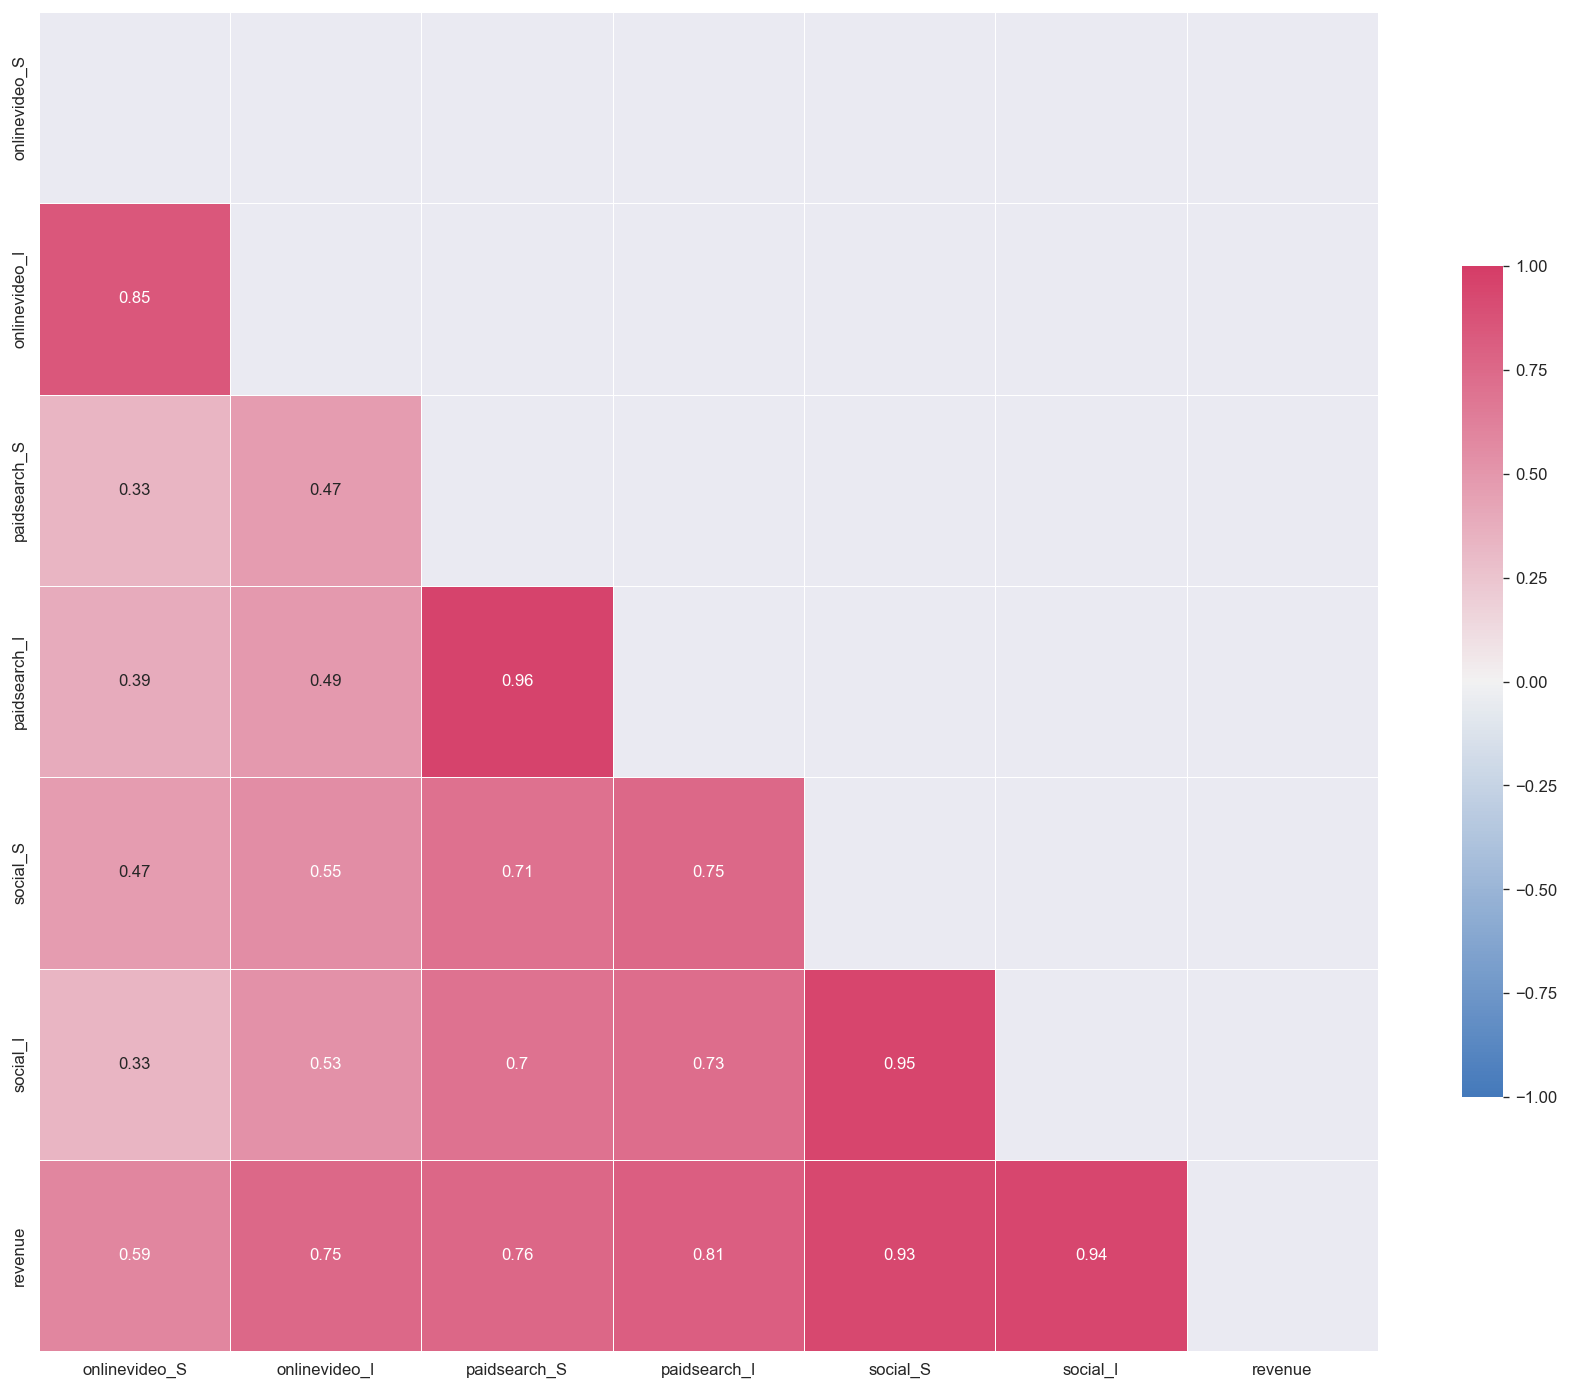

In [288]:
corr = df.corr(method="spearman", numeric_only=True).round(2)
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(18, 18))
cmap = sns.diverging_palette(250, 1, as_cmap=True)
sns.heatmap(corr, annot=True, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
corr.describe()

<AxesSubplot: xlabel='social_I', ylabel='Density'>

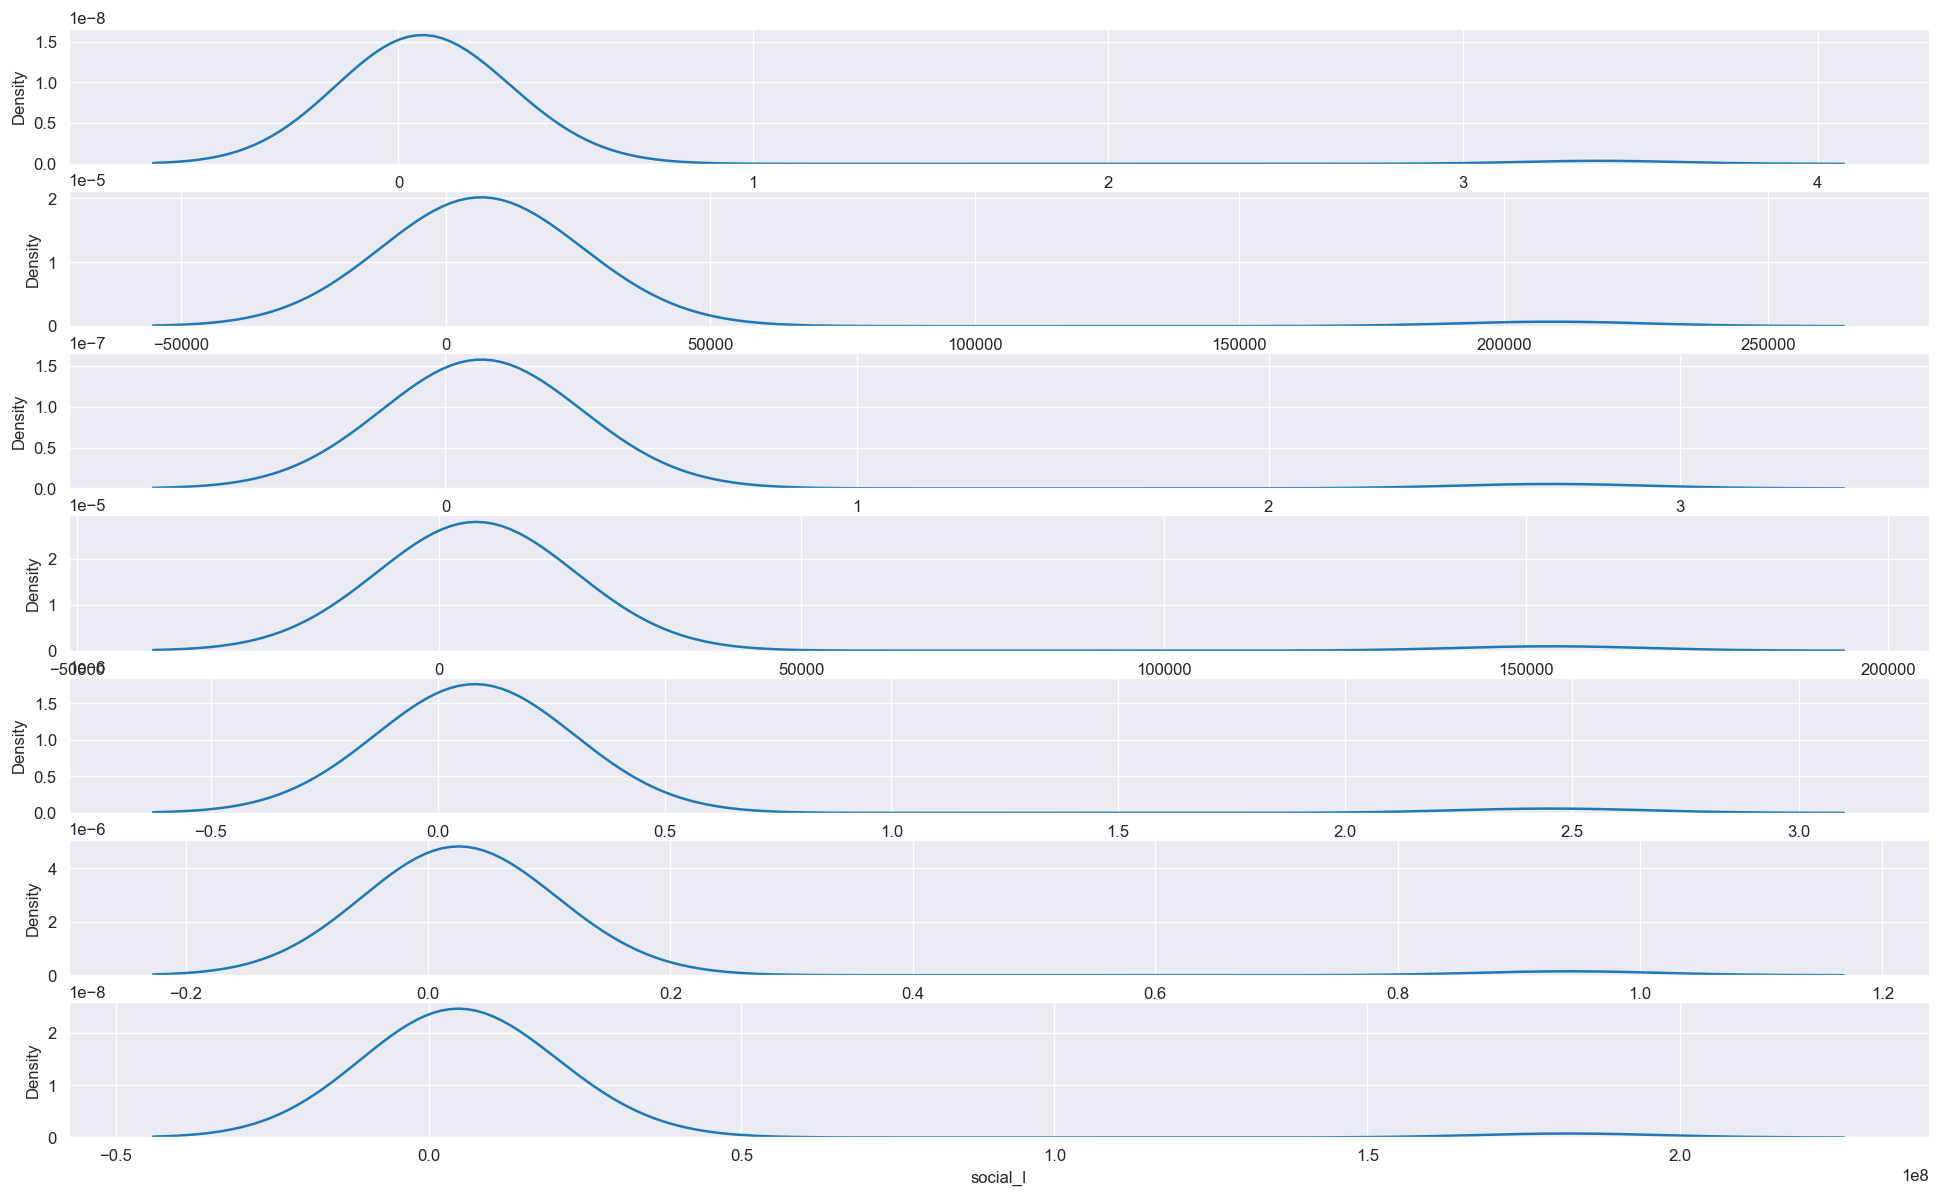

In [292]:
figure, axes = plt.subplots(7, 1, figsize=(20, 12))
sns.kdeplot(ax=axes[0], x='revenue', data=df)
sns.kdeplot(ax=axes[1], x='onlinevideo_S', data=df)
sns.kdeplot(ax=axes[2], x='onlinevideo_I', data=df)
sns.kdeplot(ax=axes[3], x='paidsearch_S', data=df)
sns.kdeplot(ax=axes[4], x='paidsearch_I', data=df)
sns.kdeplot(ax=axes[5], x='social_S', data=df)
sns.kdeplot(ax=axes[6], x='social_I', data=df)
# sns.kdeplot(ax=axes[1, 1], x='LCM_Cost', data=df_num)
# sns.kdeplot(ax=axes[1, 2], x='LCM_Imp', data=df_num)

Selecting from the most likely distributions of the data,
finds the most likely distribution for the data, its parameters,
and is useful for any data transformations.

In [296]:
temp_dm = df[['revenue', 'onlinevideo_I', 'onlinevideo_S',
              'paidsearch_I', 'paidsearch_S', 'social_I', 'social_S']]
dist_list = ['gamma', 'expon', 'cauchy', 'norm', 'uniform']

for var in temp_dm:
    dist_test = temp_dm[var].dropna()
    dist_test = dist_test.values
    f = Fitter(dist_test, distributions=dist_list, timeout=60)
    f.fit()
    print(var)
    print(f.summary(plot=False))
    print(f.get_best(method='sumsquare_error'))

Fitting 5 distributions: 100%|██████████| 5/5 [00:00<00:00, 50.15it/s]


revenue
         sumsquare_error          aic          bic  kl_div  ks_statistic  \
cauchy      4.227941e-15  4735.260942 -1690.925037     inf      0.312571   
expon       1.387599e-14  5604.768219 -1636.256586     inf      0.386437   
gamma       1.550754e-14  4278.931004 -1627.314267     inf      0.213937   
norm        2.685714e-14  5117.711083 -1605.879485     inf      0.382115   
uniform     2.944194e-14  3931.867063 -1601.652600     inf      0.885574   

            ks_pvalue  
cauchy   1.717130e-04  
expon    1.079868e-06  
gamma    2.509821e-02  
norm     1.501887e-06  
uniform  1.010963e-43  
{'cauchy': {'loc': 1686049.9720836917, 'scale': 2524567.246204196}}


Fitting 5 distributions: 100%|██████████| 5/5 [00:00<00:00, 45.77it/s]


onlinevideo_I
         sumsquare_error          aic         bic  kl_div  ks_statistic  \
cauchy      4.756604e-13  4141.807882 -979.181867     inf      0.175956   
expon       1.584126e-12  4427.202485 -941.886267     inf      0.295973   
gamma       2.007527e-12  4023.869699 -931.109289     inf      0.369325   
norm        2.620621e-12  4177.318289 -926.281534     inf      0.412998   
uniform     2.929429e-12  3425.370490 -922.828251     inf      0.864731   

            ks_pvalue  
cauchy   2.603460e-01  
expon    6.670043e-03  
gamma    2.662821e-04  
norm     2.673222e-05  
uniform  2.465552e-27  
{'cauchy': {'loc': 739173.6326505176, 'scale': 261694.27826098597}}


Fitting 5 distributions: 100%|██████████| 5/5 [00:00<00:00, 44.94it/s]


onlinevideo_S
         sumsquare_error          aic         bic  kl_div  ks_statistic  \
cauchy      5.457464e-09  3205.154493 -689.400362     inf      0.175292   
expon       2.783675e-08  3455.835547 -638.889797     inf      0.310648   
gamma       3.442001e-08  2927.072167 -628.875102     inf      0.326750   
norm        4.576617e-08  3203.237454 -623.476971     inf      0.397543   
uniform     5.084174e-08  2454.003552 -620.216619     inf      0.860308   

            ks_pvalue  
cauchy   2.642607e-01  
expon    3.725038e-03  
gamma    1.898026e-03  
norm     6.237505e-05  
uniform  6.788922e-27  
{'cauchy': {'loc': 5431.204865609108, 'scale': 1713.8451782513257}}


Fitting 5 distributions: 100%|██████████| 5/5 [00:00<00:00, 54.84it/s]


paidsearch_I
         sumsquare_error          aic         bic  kl_div  ks_statistic  \
expon       1.440953e-10  4115.640542 -802.062555     inf      0.383792   
cauchy      1.620223e-10  3573.766540 -798.427523     inf      0.174850   
gamma       1.637625e-10  3846.887015 -794.662365     inf      0.277149   
norm        3.115800e-10  3712.069895 -778.155944     inf      0.484037   
uniform     3.498436e-10  2945.116348 -774.565208     inf      0.917402   

            ks_pvalue  
expon    1.284707e-04  
cauchy   2.668914e-01  
gamma    1.347557e-02  
norm     3.286578e-07  
uniform  5.335051e-34  
{'expon': {'loc': 18516.0, 'scale': 139794.90322580645}}


Fitting 5 distributions: 100%|██████████| 5/5 [00:00<00:00, 49.65it/s]


paidsearch_S
         sumsquare_error          aic         bic  kl_div  ks_statistic  \
gamma       2.820618e-08  3226.675468 -635.047113     inf      0.269147   
expon       2.839663e-08  3526.081629 -638.272486     inf      0.357254   
cauchy      3.988756e-08  3008.637145 -627.738872     inf      0.181116   
norm        7.051785e-08  3155.356594 -610.075028     inf      0.473015   
uniform     8.021720e-08  2391.045605 -606.079993     inf      0.911268   

            ks_pvalue  
gamma    1.790458e-02  
expon    4.775168e-04  
cauchy   2.313729e-01  
norm     6.880861e-07  
uniform  4.917767e-33  
{'gamma': {'a': 0.5629651704357228, 'loc': 938.9999999999999, 'scale': 13879.912934273318}}


Fitting 5 distributions: 100%|██████████| 5/5 [00:00<00:00, 44.93it/s]


social_I
         sumsquare_error          aic          bic  kl_div  ks_statistic  \
gamma       3.402538e-14  4104.080524 -1234.676229     inf      0.228755   
expon       3.597176e-14  5029.980741 -1236.257165     inf      0.356289   
cauchy      3.790219e-14  4463.798663 -1234.375277     inf      0.315350   
norm        6.871647e-14  4690.877243 -1212.955996     inf      0.366297   
uniform     7.606669e-14  3808.055093 -1209.297618     inf      0.869865   

            ks_pvalue  
gamma    3.876641e-02  
expon    1.351409e-04  
cauchy   1.109851e-03  
norm     7.733207e-05  
uniform  2.767680e-32  
{'gamma': {'a': 0.21201312828740726, 'loc': -1.260675446128319e-22, 'scale': 98665895.69426362}}


Fitting 5 distributions: 100%|██████████| 5/5 [00:00<00:00, 47.03it/s]

social_S
         sumsquare_error          aic         bic  kl_div  ks_statistic  \
gamma       1.020737e-09  3093.458654 -863.554810     inf      0.251688   
expon       1.150086e-09  3976.963289 -862.843106     inf      0.341965   
cauchy      1.191369e-09  3427.674713 -861.573493     inf      0.290231   
norm        2.361096e-09  3642.906634 -836.948687     inf      0.368053   
uniform     2.638094e-09  2755.037641 -832.955172     inf      0.873828   

            ks_pvalue  
gamma    1.698017e-02  
expon    2.915693e-04  
cauchy   3.519692e-03  
norm     6.999081e-05  
uniform  8.980658e-33  
{'gamma': {'a': 0.23160097041500877, 'loc': -3.2856906793213583e-24, 'scale': 362003.7789540262}}


In [ ]:
# Imputing with MICE


# df_knn = df.filter(['Dig_Coupon_Imp', 'Dig_Coup_Cost',		'Dig_Demo_Cost',	'LCM_Imp',	'LCM_Cost',	'Paid_Search_Imp',	'Paid_Search_Cost',	'Signage_Imp',	'Signage Cost',	'Total_Imp',	'Total_Working_Cost'
#                      ], axis=1).copy()
#
# # df_knn = df.filter(['Distance','MaxSpeed','AvgSpeed','AvgMovingSpeed'], axis=1).copy()
#
# # Define scaler to set values between 0 and 1
#
# scaler = MinMaxScaler(feature_range=(0, 1))
# df_knn = pd.DataFrame(scaler.fit_transform(df_knn), columns = df_knn.columns)
#
# # Define KNN imputer and fill missing values
# knn_imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
# df_knn_imputed = pd.DataFrame(knn_imputer.fit_transform(df_knn), columns=df_knn.columns)


Text(0.5, 1.0, 'Sales Detrended')

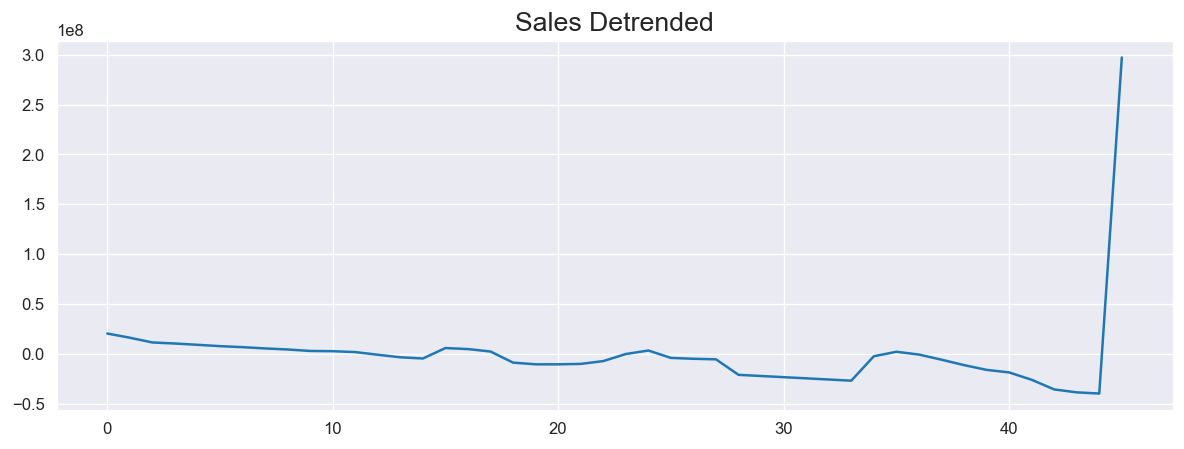

In [298]:
detrended = signal.detrend(df['revenue'].values)
plt.rcParams.update({'figure.figsize': (12,4)})
plt.plot(detrended)
plt.title('Sales Detrended', fontsize=16)

Multiplicative seasonality deconstruction does not work here with the high levels of zeroes in the data.

<AxesSubplot: xlabel='Lag', ylabel='Autocorrelation'>

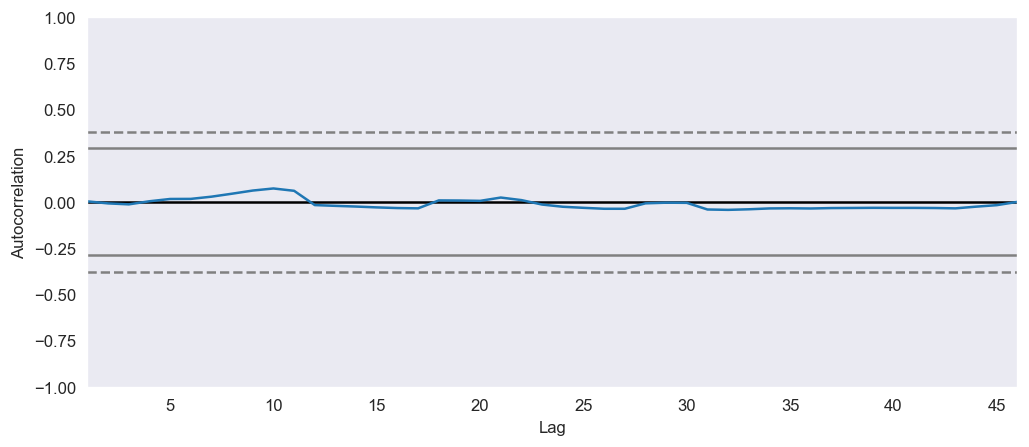

In [300]:
plt.rcParams.update({'figure.figsize':(10,4), 'figure.dpi':120})
autocorrelation_plot(df['revenue'].tolist())

In [276]:
df.to_csv('.csv', encoding='utf-8', index=False)